In [5]:
import networkx as nx
import random
import math
import csv
import multiprocessing as mp
f = open("textfilter3.csv", "rb")
g = nx.read_edgelist(f)
num_edges = g.number_of_edges()
num_nodes = g.number_of_nodes()
f.close()

newgraph = nx.DiGraph()
newgraph.add_edges_from(g.edges(), positive="True") 
nx.write_edgelist(newgraph, "newgraph3.txt", data=['positive'])

num_sample_edges = int(math.floor(0.1 * num_edges))  # positive sample data
print(num_sample_edges)
sample_edges = random.sample(newgraph.edges(), num_sample_edges)
sample_g = nx.Graph()
sample_g.add_edges_from(sample_edges, positive = "True")
nx.write_edgelist(sample_g, "positivesample3.txt", data=['positive'])  

132482


In [6]:
fake_negative = open("negativesample3.txt","w")  # make negative sample the same as num_sample_edges(positive sample data) 
# and add it to sample_g, thus sample_g has data amount of 2*num_sample_edges(2 × 132482 records of edges)
i = 0
while i < num_sample_edges:  #132482 records
    edge = random.sample(sample_g.nodes(), 2)
    try:
        shortest_path = nx.shortest_path_length(sample_g,source=edge[0],target=edge[1])
        if shortest_path !=1:
            sample_g.add_edge(edge[0],edge[1], positive="False")   #add neagtive case            
            i += 1
    except:
        sample_g.add_edge(edge[0],edge[1], positive="False") 
        i +=1   
    fake_negative.write(str(edge[0])+" "+str(edge[1])+" False\n")
fake_negative.close()

In [7]:
print(sample_g.number_of_edges())
nx.write_edgelist(sample_g, "allsample3.txt", delimiter=',' , data = ['positive'])

264964


In [8]:
import csv
import pandas as pd
import numpy as np
import multiprocessing as mp
f = open("testdata.csv", "rb")
dftest = pd.read_table('testdata.csv', sep = '\t', names = ["source", "target"])
dftest[:5]

,source,target
0,2184483,1300190
1,3151356,1452193
2,1579396,193159
3,1406432,2481036
4,2389638,593017


In [9]:
pr = nx.pagerank(newgraph)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_table('trainingdataframe.txt', sep = '\t')

In [17]:
sourcepr = []
targetpr = []
for s in df["source"]:
    sourcepr.append(pr[str(s)])
for s in df["target"]:
    targetpr.append(pr[str(s)])

In [19]:
df["Sourcepr"] = sourcepr
df["Targetpr"] = targetpr
df[:4]

,Unnamed: 0,source,target,positive,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation,Sourcepr,Targetpr
0,0,2789436,2203730,True,43,0.112565,36036,7.807700,0.202805,0.000004,0.000006
1,1,2789436,1467962,True,54,0.113924,67760,10.368729,0.354982,0.000004,0.000006
2,2,2789436,812874,True,27,0.076705,21868,4.776423,0.141276,0.000004,0.000005
3,3,2789436,3183013,True,25,0.075988,14168,5.283508,0.285230,0.000004,0.000006


In [2]:
#df.drop(df.columns[[0,1]], axis=1, inplace=True)
df[:2]

,Unnamed: 0,source,target,positive,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation
0,0,2789436,2203730,True,43,0.112565,36036,7.807700,0.202805
1,1,2789436,1467962,True,54,0.113924,67760,10.368729,0.354982


In [31]:
df.describe()

,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation,Sourcepr,Targetpr
count,264964.000000,264964.000000,2.649640e+05,264964.000000,264964.000000,264964.000000,264964.000000
mean,9.787726,0.016103,4.194262e+04,1.711725,0.051195,0.000013,0.000010
std,35.713417,0.037162,1.664428e+05,6.869503,0.263697,0.000021,0.000015
min,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000004,0.000004
25%,0.000000,0.000000,1.400000e+02,0.000000,0.000000,0.000004,0.000004
50%,0.000000,0.000000,1.440000e+03,0.000000,0.000000,0.000006,0.000005
75%,7.000000,0.016667,2.022300e+04,1.218961,0.024060,0.000010,0.000008
max,1721.000000,1.000000,7.660485e+06,345.763825,13.814983,0.000279,0.000279


In [34]:
df_norm = df[['Common', 'Jaccard', "PreferentialAttachment", "AdamicAdar", "ResourceAllocation","Sourcepr","Targetpr"]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm[:3]

,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation,Sourcepr,Targetpr
0,0.024985,0.112565,0.004704,0.022581,0.014680,0.00044,0.006048
1,0.031377,0.113924,0.008845,0.029988,0.025695,0.00044,0.009100
2,0.015689,0.076705,0.002855,0.013814,0.010226,0.00044,0.004754


In [22]:
corr = df.corr()

,positive,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation,Sourcepr,Targetpr
positive,1.000000,0.264289,0.392264,0.236218,0.241358,0.190700,0.037358,0.087551
Common,0.264289,1.000000,0.557371,0.873392,0.994626,0.884286,-0.093883,-0.043672
Jaccard,0.392264,0.557371,1.000000,0.317367,0.563675,0.600359,-0.086978,-0.005284
PreferentialAttachment,0.236218,0.873392,0.317367,1.000000,0.868294,0.758920,-0.091062,-0.023363
AdamicAdar,0.241358,0.994626,0.563675,0.868294,1.000000,0.921255,-0.082796,-0.037226
ResourceAllocation,0.190700,0.884286,0.600359,0.758920,0.921255,1.000000,-0.047076,-0.006804
Sourcepr,0.037358,-0.093883,-0.086978,-0.091062,-0.082796,-0.047076,1.000000,-0.041111
Targetpr,0.087551,-0.043672,-0.005284,-0.023363,-0.037226,-0.006804,-0.041111,1.000000


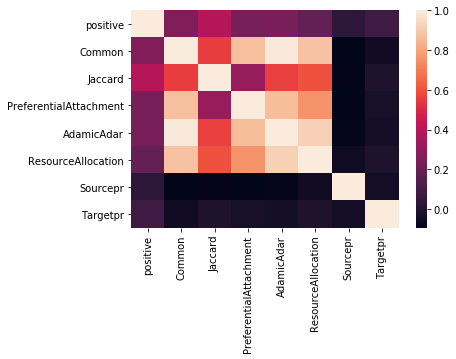

In [24]:
import seaborn as sns
%matplotlib inline
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [37]:
target = df[['positive']]
df = pd.concat([df_norm, target], axis=1)
df[:3]

,Common,Jaccard,PreferentialAttachment,AdamicAdar,ResourceAllocation,Sourcepr,Targetpr,positive
0,0.024985,0.112565,0.004704,0.022581,0.014680,0.00044,0.006048,True
1,0.031377,0.113924,0.008845,0.029988,0.025695,0.00044,0.009100,True
2,0.015689,0.076705,0.002855,0.013814,0.010226,0.00044,0.004754,True


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
from sklearn.metrics import accuracy_score
training = train[['Common', 'Jaccard', "PreferentialAttachment", "AdamicAdar", "ResourceAllocation"]]
training_labels = train['positive']
testing = test[['Common', 'Jaccard', "PreferentialAttachment", "AdamicAdar", "ResourceAllocation"]]
testing_labels = test['positive']
training1 = train[['Common', "AdamicAdar"]]
training_labels1 = train['positive']
testing1 = test[['Common', "AdamicAdar"]]
testing_labels1 = test['positive']
training2 = train[['Jaccard', 'PreferentialAttachment']]
training_labels2 = train['positive']
testing2 = test[['Jaccard', 'PreferentialAttachment']]
testing_labels2 = test['positive']
training3 = train[['Common', 'Jaccard', "PreferentialAttachment", "AdamicAdar"]]
training_labels3 = train['positive']
testing3 = test[['Common', 'Jaccard', "PreferentialAttachment", "AdamicAdar"]]
testing_labels3 = test['positive']

In [5]:
from sklearn import svm
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import accuracy_score
def mySvm(training, training_labels, testing, testing_labels):
    #Support Vector Machine
    clf = svm.SVC()
    clf.fit(training, training_labels)
    print ("+++++++++ Finishing training the SVM classifier ++++++++++++")
    result = clf.predict(testing)
    print ("SVM accuracy:", accuracy_score(testing_labels, result))

def myTree(training, training_labels, testing, testing_labels):
    clf = RandomForestClassifier(random_state=0)
    result = clf.fit(training, training_labels).predict(testing)
    print ("+++++++++ Finishing training the Decision Tree classifier ++++++++++++")
    print ("Random Forest accuracy:", accuracy_score(testing_labels, result))

In [ ]:
from sklearn.metrics import accuracy_score
mySvm(training1, training_labels1, testing1, testing_labels1)
myTree(training1, training_labels1, testing1, testing_labels1)

+++++++++ Finishing training the SVM classifier ++++++++++++
SVM accuracy: 0.838180903258
+++++++++ Finishing training the Decision Tree classifier ++++++++++++
Random Forest accuracy: 0.830695684992


In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 2)
rfe = rfe.fit(training, training_labels)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(training, training_labels)
# display the relative importance of each attribute based on extra classifier is 'Common', 'Jaccard', "AdamicAdar"
print(model.feature_importances_)

[False  True  True False False False False]
[2 1 1 3 4 5 6]
[ 0.1410962   0.0935227   0.27872003  0.13479721  0.06637201  0.14626355
  0.13922832]


In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=3).fit(training, training_labels)
print('Score list:', select_feature.scores_)
print('Feature list:', training.columns)
# The same best features are 'Common','PreferentialAttachment', 'AdamicAdar'
# Thus we only choose 3 features as siginificant attributes

Score list: [  979.42336549  2435.26875589   891.45653541   859.64149836   660.29515642
    43.87494122   177.73808969]
Feature list: Index(['Common', 'Jaccard', 'PreferentialAttachment', 'AdamicAdar',
       'ResourceAllocation', 'Sourcepr', 'Targetpr'],
      dtype='object')


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import grid_search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
log = log.fit(training1, training_labels1)
resulttesting = log.predict(testing1)
resutlttraining = log.predict(training1)
print ("LogisticRegression validation data accuracy:", accuracy_score(testing_labels1, resulttesting))
print ("LogisticRegression development data accuracy:", accuracy_score(training_labels1, resutlttraining))
best_parameters, score, _ = max(log.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)

LogisticRegression validation data accuracy: 0.823348848912
LogisticRegression development data accuracy: 0.822783786407
Raw AUC score: 0.822767611633


C:\Users\Cheryl Zhang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [29]:
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

C: 1000


In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RFR = RandomForestRegressor()
parameters = {'n_estimators': [5, 10, 100],
              #'criterion': ['mse'],
              #'max_depth': [5, 10, 15], 
              #'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1,5]
             }
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, #Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(training2, training_labels2)
RFR = grid_obj.best_estimator_
RFR.fit(training2, training_labels2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import r2_score
predictions = RFR.predict(testing2)
predictions2 = RFR.predict(training2)
best_parameters, score, _ = max(log.grid_scores_, key=lambda x: x[1])
print('Raw AUC score of Random Forest:', score)
print ("RFR validation data accuracy:", accuracy_score(testing_labels2, predictions))
print ("RFR development data accuracy:", accuracy_score(training_labels2, predictions2))
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Raw AUC score of Random Forest: 0.822767611633
RFR validation data accuracy: 0.843150081771
RFR development data accuracy: 0.842813547991
C: 1000


C:\Users\Cheryl Zhang\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [57]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
xgb_model = xgb.XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


xgclf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(training_labels2, n_folds=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

xgclf.fit(training2, training_labels2)
best_parameters, score, _ = max(xgclf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
resulttesting = xgclf.predict(testing2)
resutlttraining = xgclf.predict(training2)
print ("Xgboost validation data accuracy:", accuracy_score(testing_labels2, resulttesting))
print ("Xgboost development data accuracy:", accuracy_score(training_labels2, resutlttraining))
print ("Xgboost accuracy:", accuracy_score(testing_labels2, resulttesting))
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   10.8s finished


Raw AUC score: 0.8808907250155672
Xgboost validation data accuracy: 0.843150081771
Xgboost development data accuracy: 0.842813547991
Xgboost accuracy: 0.843150081771
colsample_bytree: 0.7
learning_rate: 0.05
max_depth: 6
min_child_weight: 11
missing: -999
n_estimators: 5
nthread: 4
objective: 'binary:logistic'
seed: 1337
silent: 1
subsample: 0.8


In [62]:
import keras

# Convert data as np.array
features = np.array(training2)
targets = np.array(training_labels2.reshape(training_labels2.shape[0],1))
features_validation= np.array(testing2)
targets_validation = np.array(testing_labels2.reshape(testing_labels2.shape[0],1))

print(features[:10])
print(targets[:10])

Using TensorFlow backend.


[[  0.00000000e+00   7.83240328e-07]
 [  0.00000000e+00   5.35214224e-06]
 [  2.68096515e-03   4.50154324e-03]
 [  0.00000000e+00   2.57163908e-05]
 [  0.00000000e+00   1.04301504e-04]
 [  0.00000000e+00   7.81934927e-05]
 [  1.06022053e-02   3.46089098e-02]
 [  0.00000000e+00   3.91620164e-07]
 [  1.36892539e-02   1.96866151e-02]
 [  0.00000000e+00   6.13538257e-06]]
[[False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]]


C:\Users\Cheryl Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Cheryl Zhang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [63]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(training2.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(training2, training_labels2, batch_size = 32, epochs = 50)
predictions = model.predict(features_validation, verbose=0)
print('R2 score = ',r2_score(testing_labels2, predictions), '/ 1.0')

Epoch 1/50
185474/185474 [==============================] - 14s 73us/step - loss: 0.1354 - mean_squared_error: 0.1354
Epoch 2/50
185474/185474 [==============================] - 14s 75us/step - loss: 0.1356 - mean_squared_error: 0.1356
Epoch 3/50
185474/185474 [==============================] - 14s 75us/step - loss: 0.1361 - mean_squared_error: 0.1361
Epoch 4/50
185474/185474 [==============================] - 14s 73us/step - loss: 0.1349 - mean_squared_error: 0.1349
Epoch 5/50
185474/185474 [==============================] - 14s 74us/step - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 6/50
185474/185474 [==============================] - 13s 71us/step - loss: 0.1360 - mean_squared_error: 0.1360
Epoch 7/50
185474/185474 [==============================] - 13s 72us/step - loss: 0.1352 - mean_squared_error: 0.1352
Epoch 8/50
185474/185474 [==============================] - 14s 73us/step - loss: 0.1352 - mean_squared_error: 0.1352
Epoch 9/50
185474/185474 [==============================

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
svmclf = GridSearchCV(svm, parameters)
svmclf.fit(training1,training_labels1)
print("accuracy:"+str(np.average(cross_val_score(svmclf, training1, training_labels1, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(svmclf, training1, training_labels1, scoring='f1'))))
resulttesting = svmclf.predict(testing1)
resutlttraining = svmclf.predict(training1)
print ("LogisticRegression validation data accuracy:", accuracy_score(testing_labels1, resulttesting))
print ("LogisticRegression development data accuracy:", accuracy_score(training_labels1, resutlttraining))
best_parameters, score, _ = max(log.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

In [32]:
from pandas import DataFrame, Series
import pandas as pd
pd.read_table('C:/Users/Cheryl Zhang/Desktop/pred.txt', sep = '\t')
pdtable = pd.read_table('C:/Users/Cheryl Zhang/Desktop/pred.txt', sep = '\t')
print(pdtable[:5])

   Unnamed: 0   source   target        aa  common
0           0  2184483  1300190  0.000000       0
1           1  3151356  1452193  0.407705       4
2           2  1579396   193159  0.000000       0
3           3  1406432  2481036  1.238898       7
4           4  2389638   593017  0.802812       6


In [36]:
pred = pdtable[['common', 'aa']]
len(pred)
pred.columns = ['Common', 'AdamicAdar']
pred[:3]

,Common,AdamicAdar
0,0,0.000000
1,4,0.407705
2,0,0.000000


In [37]:
test_probs = clf.predict_proba(pred)[:,1]
print(test_probs[:3])

[ 0.43541113  0.56757724  0.43541113]


In [41]:
preprob = log.predict_proba(pred)[:,1]
print(preprob[:3])

[ 0.25724323  0.09355926  0.25724323]


In [43]:
sample = pd.read_csv('C:/Users/Cheryl Zhang/Desktop/sample.csv')
sample.Prediction = test_probs
sample.to_csv("submissionxgboost.csv", index=False)

In [44]:
sample.Prediction = preprob
sample.to_csv("submissionlog.csv", index=False)